#### Doing these calculations takes 2+ hours to run, so instead of doing these in the notebook, I wrote a python script and save my results into these textfiles (sum_args_list*)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# %load plot_mass.py
import matplotlib
matplotlib.use("Agg")
import pylab
import numpy as np
import matplotlib.pyplot as plt
import yt
yt.funcs.mylog.setLevel(50) #coerce output null
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import os
import sys
fat_fname=sys.argv[1]
#os.chdir("../../project/FLASH4.3_2/object/fat{}/".format(fat_fname))
os.chdir("../../project/FLASH4.3_3/object/fat{}/".format(fat_fname))
G = 6.67e-8 #cgs
a = 28730.5 #cm/s
timestep= 0 
ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
lev = 5
dim = 2**(lev+3)
#all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
#dens_arr =  np.array(all_data["density"])
margin = dim/3
start  = margin
end = dim-margin
#start = 0
#end = dim
cell_size = int((ds.domain_width/dim)[0].in_cgs())
print "cell size: ", cell_size
print end-start
print "looping through: ", (end-start)**3
boxlen = 1e19
ctr =dim/2
dr=cell_size
xi_range = np.logspace(-2,np.log10(17),num=20)
r_range = xi_range/1.057E-17
	#let dr = cell_size
xyzrange = np.arange(start,end)
def plot_MR(timestep):
	ds = yt.load("sod_hdf5_chk_{}".format(str(timestep).zfill(4)))
	all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
	dens_arr =  np.array(all_data["density"])
	print "Working on t = ", timestep
	sum_args_list = []
	for ri in r_range:
#	    print "Looking at radius: ", ri
	    sum_args = 0
	    for i in xyzrange:
		for j in xyzrange:
		    for k in xyzrange:
	#		print "(i,j,k)",i,j,k
			r = np.sqrt((i-ctr)**2+(j-ctr)**2+(k-ctr)**2)*cell_size
	#		print "(r,ri): ",r,ri
			if np.isclose(r,ri,atol=dr):#atol is +/-
	#                     if r<ri:
	  #                  print "hit r :" , r
			    sum_args+=r*dens_arr[i][j][k]*dr
	    print sum_args
	    sum_args_list.append(sum_args)
	sum_args_list = np.array(sum_args_list)

	np.savetxt("sum_args_list{}.txt".format(timestep),sum_args_list)
	print "sum_args_list: ",sum_args_list
	plt.loglog(xi_range,4*np.pi*G*sum_args_list/a,label= "t={}".format(timestep))
	#plt.loglog(xi_range,4*np.pi*G*sum_args_list/a)
	plt.savefig('mass{}.png'.format(timestep))

plt.figure()
#tlst = [0,10,20,30]
#tlst = [22, 24, 26, 28, 30, 31]
#tlst = [0,10,20,25,30,34,36,38,39,40]
tlst = [  0,  20,  40,  60,  80, 100,110]
for t in tlst :
	plot_MR(t)
plt.legend(loc='upper left')
plt.savefig("MRplot.png")


# Fatten = 1000

In [19]:
G = 6.67e-8 #cgs
a = 28730.5 #cm/s
xi_range = np.logspace(-2,np.log10(17),num=20)

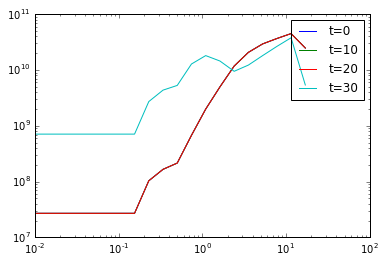

In [25]:
for s in [0,10,20,30]:
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat1000/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s))
plt.legend()

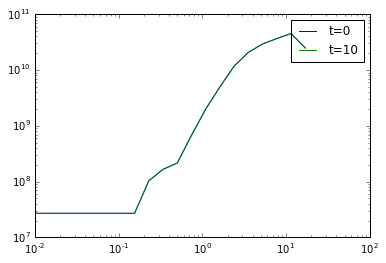

In [24]:
for s in [0,10]:#,20,30]:
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat1000/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s))
plt.legend()

so t = 0, 10, 20 all look the same and lie on top of each other. Only changes start happening after t=20. 

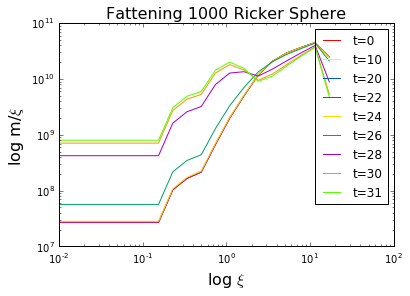

In [57]:
tlst = [0,10,20,22,24,26,28,30,31]
hsv = plt.get_cmap('prism')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat1000/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
plt.legend()
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 1000 Ricker Sphere",fontsize=16)

# Fatten =  100

chk file up to 40 

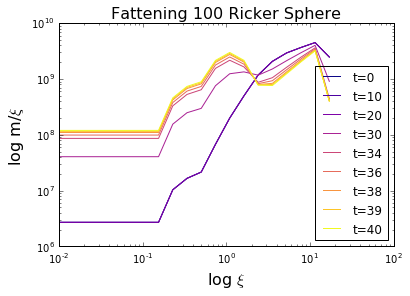

In [73]:
tlst = [0,10,20,30,34,36,38,39,40]
hsv = plt.get_cmap('plasma')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat100/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 100 Ricker Sphere",fontsize=16)

# Fatten =31.6

chk file up to 247, but things go awry on or before 120 

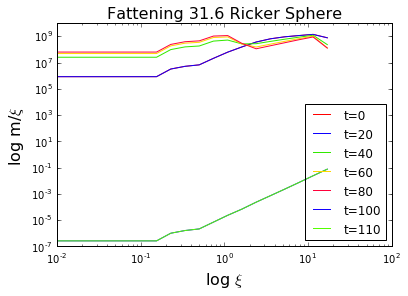

In [66]:
tlst = [  0,  20,  40,  60,  80, 100,110]
hsv = plt.get_cmap('prism')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../project/FLASH4.3_3/object/fat31/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 31.6 Ricker Sphere",fontsize=16)

# Fatten =10

chk file up to 104

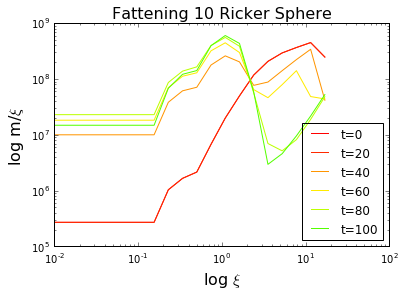

In [62]:
tlst = [  0,  20,  40,  60,  80, 100]
hsv = plt.get_cmap('prism')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat10/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 10 Ricker Sphere",fontsize=16)

# Fatten  = 3

chk file up to 95 

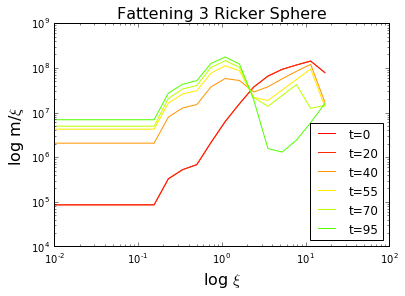

In [75]:
tlst = [  0,  20,  40,  55,  70, 95]
hsv = plt.get_cmap('prism')
colors = hsv(np.linspace(0, 1.0, len(tlst)))
for s , c in zip(tlst,colors):
    data = np.loadtxt("../../project/FLASH4.3_2/object/fat3/sum_args_list{}.txt".format(s))
    plt.loglog(xi_range,4*np.pi*G*data/a,label= "t={}".format(s), color=c)
plt.legend(loc ="lower right")
plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 3 Ricker Sphere",fontsize=16)